In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
class InfiniteVariance:
    def series_gen(self):
        left = 0
        right = 1
        
        trajectory = []
        while(True):
            if(random.random() < 0.5):
                trajectory.append(right)
                return 0, trajectory
            elif(random.random() < 0.1):
                trajectory.append(left)
                return 1, trajectory
            else:
                trajectory.append(left)
    
    def MC(self):
        q = np.zeros((2,2))
        c = np.zeros((2,2))
        
        plt.figure(figsize=(30,20))
        for runs in range(10):
            reward = []
            for episode in range(100000):
                returns, trajectory = self.series_gen()
                if(trajectory[-1] == 1):
                    rho = 0
                else:
                    rho = 1/(0.5)**len(trajectory)
                reward.append(rho*returns)
            reward = np.add.accumulate(reward)
            values = np.array(reward)/np.arange(1, 100000 + 1)
            plt.plot(values)
            plt.xscale('log')

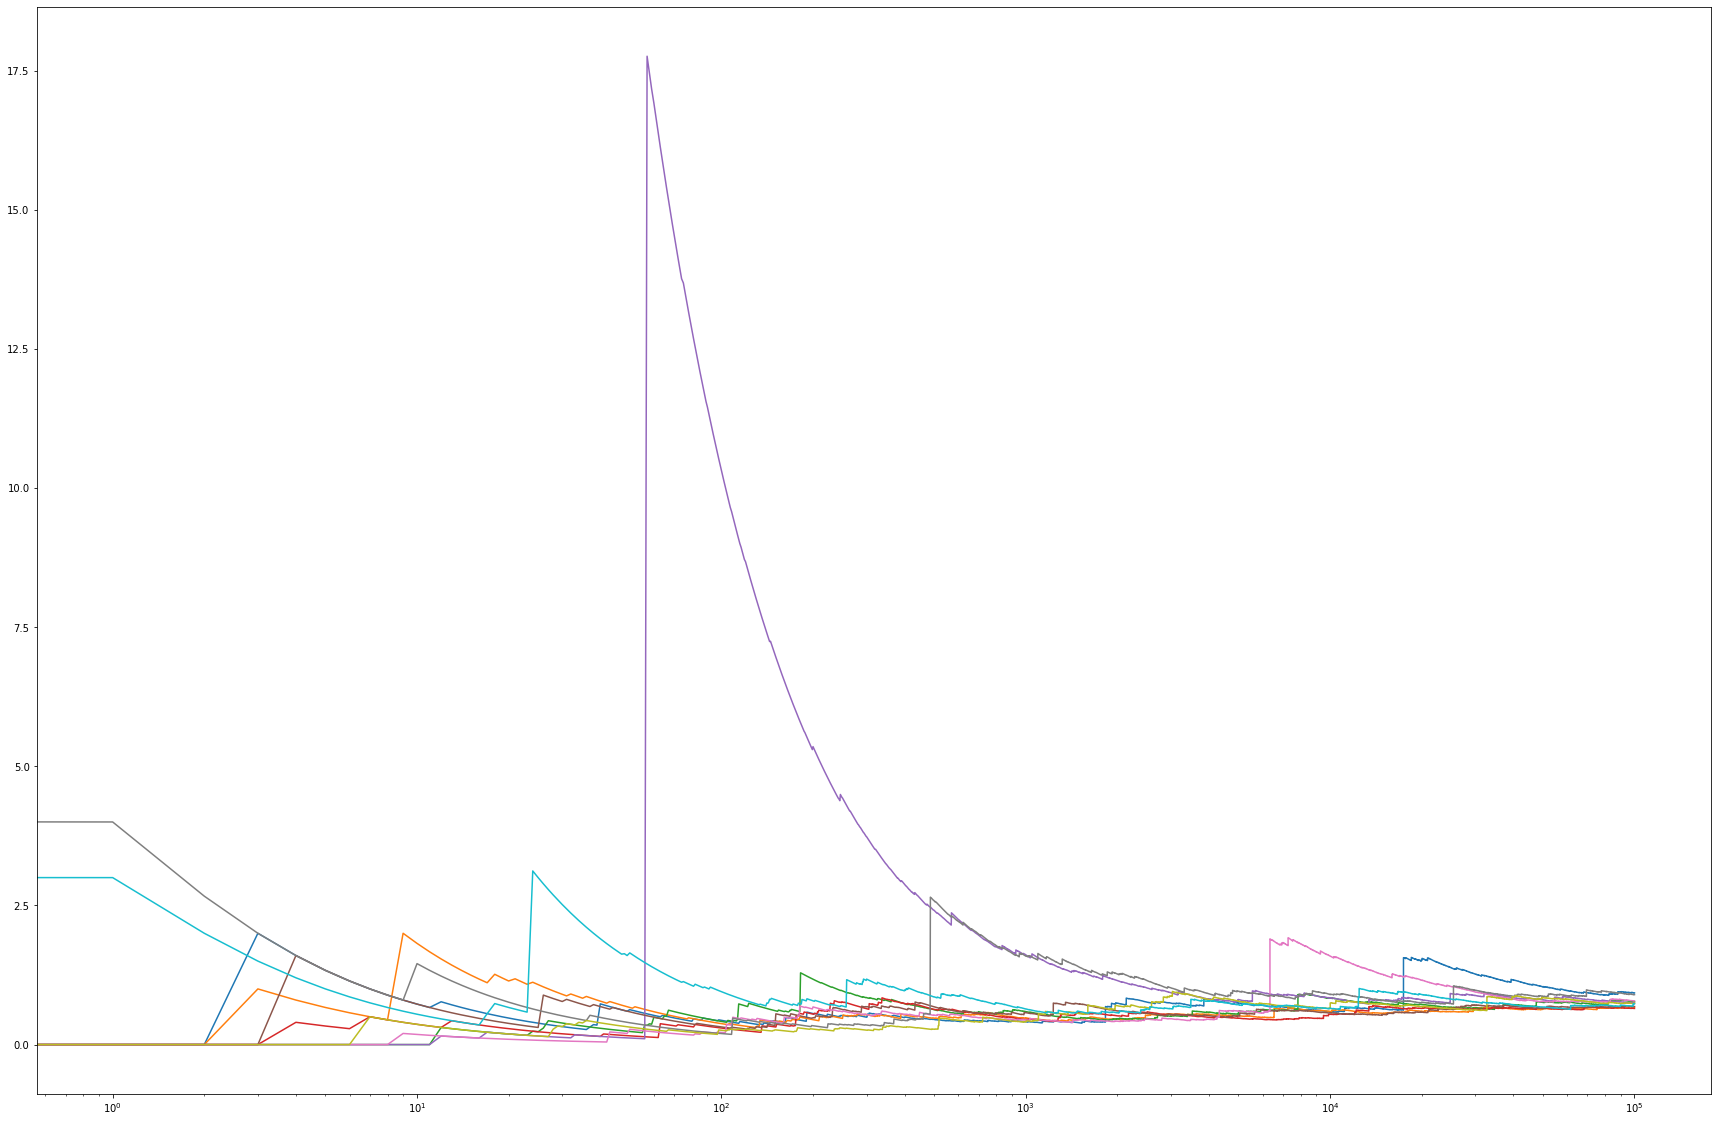

In [18]:
inf = InfiniteVariance()
inf.MC()